# ROC Curve

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

We binarize `y_test`

In [6]:
y_test = label_binarize(y_test, classes=[0, 1, 2])
n_class = y_test.shape[1]
print(y_test[:3])

[[0 1 0]
 [1 0 0]
 [0 0 1]]


In [7]:
classifier = KNeighborsClassifier(n_neighbors=100)
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)
print(y_score[:3])

[[0.2  0.41 0.39]
 [0.4  0.41 0.19]
 [0.2  0.41 0.39]]


In [8]:
classifier.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
classifier.predict_proba(X_test)

array([[0.2 , 0.41, 0.39],
       [0.4 , 0.41, 0.19],
       [0.2 , 0.41, 0.39],
       [0.2 , 0.41, 0.39],
       [0.2 , 0.41, 0.39],
       [0.4 , 0.41, 0.19],
       [0.31, 0.41, 0.28],
       [0.2 , 0.41, 0.39],
       [0.2 , 0.41, 0.39],
       [0.25, 0.41, 0.34],
       [0.2 , 0.41, 0.39],
       [0.4 , 0.41, 0.19],
       [0.4 , 0.41, 0.19],
       [0.4 , 0.41, 0.19],
       [0.4 , 0.41, 0.19],
       [0.2 , 0.41, 0.39],
       [0.2 , 0.41, 0.39],
       [0.27, 0.41, 0.32],
       [0.2 , 0.41, 0.39],
       [0.2 , 0.41, 0.39],
       [0.4 , 0.41, 0.19],
       [0.2 , 0.41, 0.39],
       [0.4 , 0.41, 0.19],
       [0.2 , 0.41, 0.39],
       [0.2 , 0.41, 0.39],
       [0.2 , 0.41, 0.39],
       [0.2 , 0.41, 0.39],
       [0.2 , 0.41, 0.39],
       [0.4 , 0.41, 0.19],
       [0.4 , 0.41, 0.19]])

Remember:

* `.predict()` will output a 0 or a 1.
* `.predict_proba()` will output a probability estimate.

## Compute ROC curve and ROC-AUC for each class

In [10]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

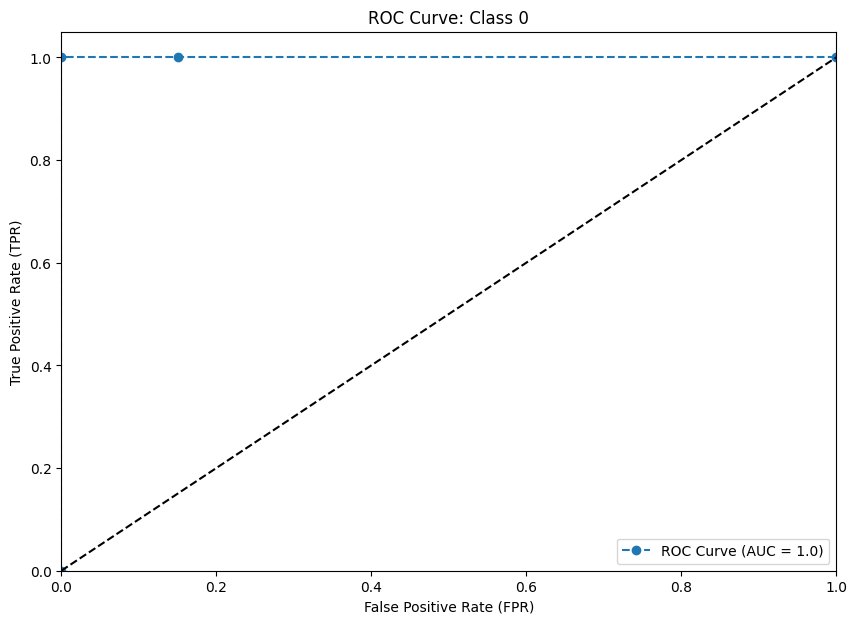

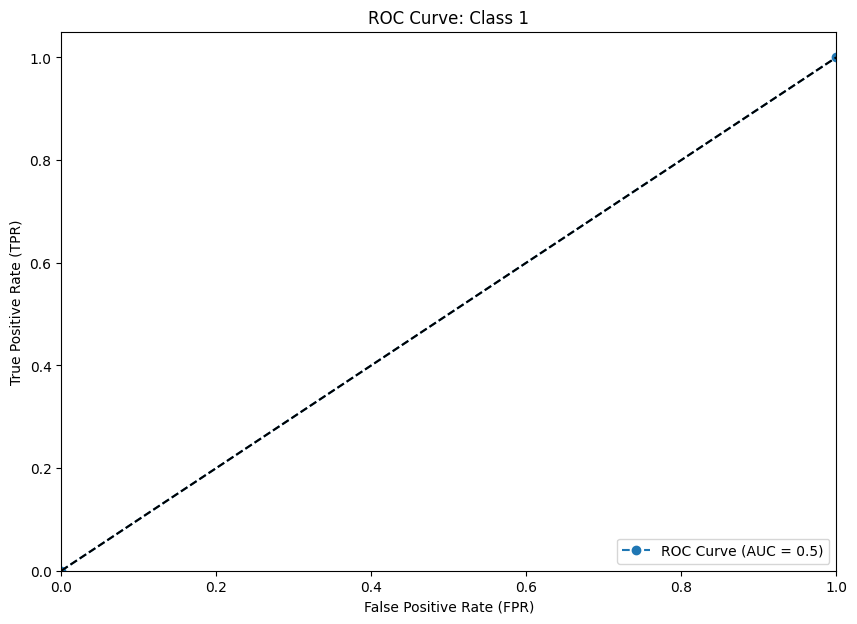

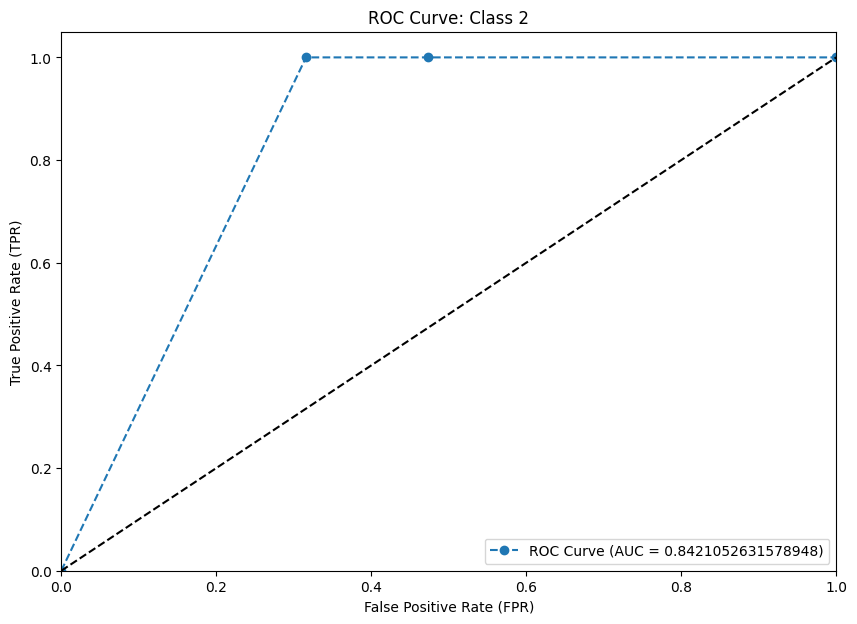

In [11]:
for i in range(n_class):
    plt.figure(figsize=(10, 7))
    plt.plot(fpr[i], tpr[i],'o--', label=f"ROC Curve (AUC = {roc_auc[i]})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f"ROC Curve: Class {i}")
    plt.legend(loc="lower right")
    plt.show()